In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy
import scipy.stats as stats
from statistics import stdev

import env
import explore
import acquire
import prepare

plt.rcParams['figure.figsize'] = (4, 2)

Using iris data from our mySQL server and the methods used in the lesson above:

## 1. Acquire, prepare & split your data.

Acquire data using acquire.py

        Aquires iris data from SQL db and merges measurement and species tables

In [2]:
df = acquire.get_iris_data()
df

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...
145,3,146,6.7,3.0,5.2,2.3,virginica
146,3,147,6.3,2.5,5.0,1.9,virginica
147,3,148,6.5,3.0,5.2,2.0,virginica
148,3,149,6.2,3.4,5.4,2.3,virginica


Prep the data using prepare.prep_iris

    Takes in data from the iris db and turns it into a dataframe.
    Drops 'species_id' and 'measurement_id' columns.
    Renames the 'species_name' column to 'species'.
    Creates dummy variables of species name.

In [3]:
df = prepare.prep_iris(df)
df = df.drop(columns=['setosa','versicolor','virginica'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Split the data into train, validate, and test samples

In [5]:
train, test = train_test_split(df, 
                               test_size=.2, 
                               random_state=123, 
                               stratify=df.species)

train, validate = train_test_split(train, 
                                   test_size=.3, 
                                   random_state=123, 
                                   stratify=train.species)
print(train.shape, validate.shape, test.shape)

(84, 5) (36, 5) (30, 5)


## 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [6]:
# Create the variables that hold the categorical and quantitative measurements

cat_vars = ['setosa','versicolor','virginica']
quant_vars = ['sepal_length','sepal_width','petal_length','petal_width']

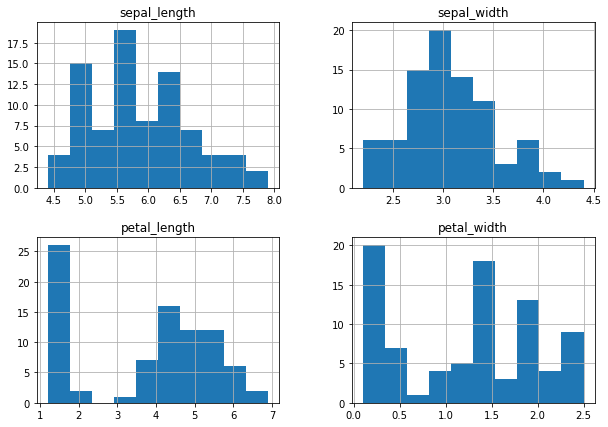

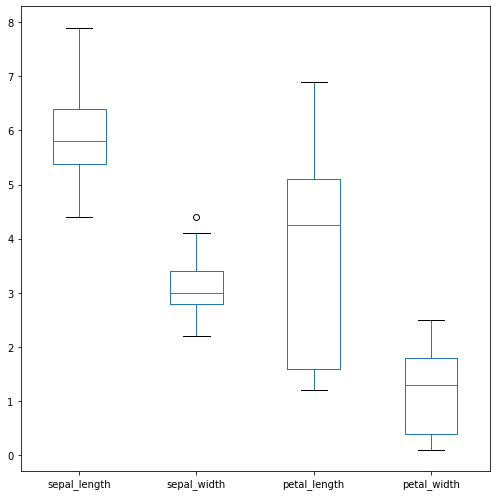

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
train[quant_vars].hist(figsize=(10,7))
train[quant_vars].plot.box(figsize=(7,7))
plt.tight_layout()
plt.show()
train[quant_vars].describe()

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [8]:
species_piv = train.pivot_table(columns=train.species).head(4)
species_piv.T

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.507143,0.275000,5.089286,3.467857
versicolor,4.271429,1.314286,5.896429,2.796429
virginica,5.535714,2.021429,6.625000,2.960714


(array([0, 1, 2, 3]),
 [Text(0, 0, 'petal_length'),
  Text(1, 0, 'petal_width'),
  Text(2, 0, 'sepal_length'),
  Text(3, 0, 'sepal_width')])

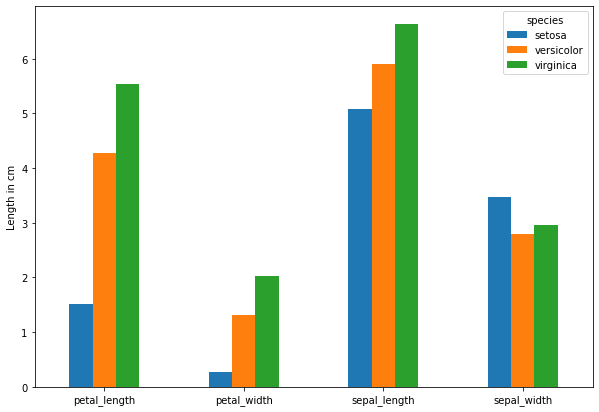

In [9]:
# The bar plot
species_piv.plot.bar(figsize=(10,7))
plt.ylabel('Length in cm')
plt.xticks(rotation=0)

- Document takeaways & any actions.

> On average, setosa  has the smallest measurements, followed by versicolor, then virginica (all measurements except sepal width)

> Sepal width does not appear to be a good inidicator of iris species.

> Petal length appears to be the most reliable indicartor of species.


## 3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

<function matplotlib.pyplot.show(close=None, block=None)>

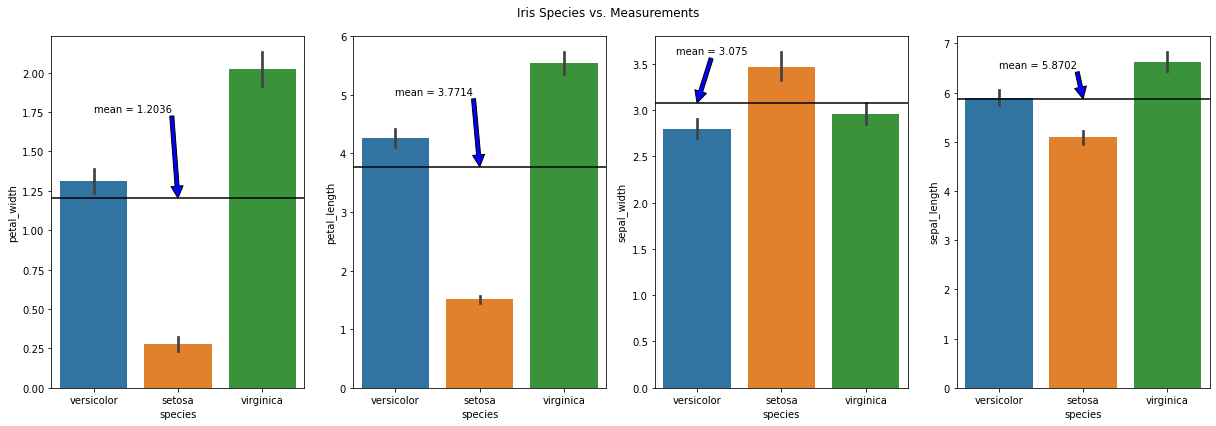

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 6), sharex=True)
sns.color_palette("tab10")
fig.suptitle('Iris Species vs. Measurements')

sns.barplot(ax=axes[0], y='petal_width', x='species', data=train)
axes[0].axhline(train.petal_width.mean(), color='black')
axes[0].annotate(f'mean = {round(train.petal_width.mean(), 4)}', xy=(1, train.petal_width.mean()), xytext=(0, 1.75),
             arrowprops={'facecolor': 'blue'})

sns.barplot(ax=axes[1], y='petal_length', x='species', data=train)
axes[1].axhline(train.petal_length.mean(), color='black')
axes[1].annotate(f'mean = {round(train.petal_length.mean(), 4)}', xy=(1, train.petal_length.mean()), xytext=(0, 5),
             arrowprops={'facecolor': 'blue'})

sns.barplot(ax=axes[2], y='sepal_width', x='species', data=train)
axes[2].axhline(train.sepal_width.mean(), color='black')
axes[2].annotate(f'mean = {round(train.sepal_width.mean(), 4)}', xy=(0, train.sepal_width.mean()), xytext=(-0.25, 3.6),
             arrowprops={'facecolor': 'blue'})

sns.barplot(ax=axes[3], y='sepal_length', x='species', data=train)
axes[3].axhline(train.sepal_length.mean(), color='black')
axes[3].annotate(f'mean = {round(train.sepal_length.mean(), 4)}', xy=(1, train.sepal_length.mean()), xytext=(0, 6.5),
             arrowprops={'facecolor': 'blue'})

plt.tight_layout()
plt.show

- For each measurement type, compute the descriptive statistics for each species.

In [11]:
train

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
...,...,...,...,...,...
11,4.8,3.4,1.6,0.2,setosa
85,6.0,3.4,4.5,1.6,versicolor
55,5.7,2.8,4.5,1.3,versicolor
44,5.1,3.8,1.9,0.4,setosa


In [12]:
print('Setosa')
print(train[train.species=='setosa'].describe())

Setosa
       sepal_length  sepal_width  petal_length  petal_width
count     28.000000    28.000000     28.000000     28.00000
mean       5.089286     3.467857      1.507143      0.27500
std        0.360390     0.427788      0.184448      0.12057
min        4.400000     2.300000      1.200000      0.10000
25%        4.875000     3.275000      1.400000      0.20000
50%        5.000000     3.400000      1.500000      0.20000
75%        5.400000     3.800000      1.600000      0.40000
max        5.800000     4.400000      1.900000      0.60000


In [13]:
print('Versicolor')
print(train[train.species=='versicolor'].describe())

Versicolor
       sepal_length  sepal_width  petal_length  petal_width
count     28.000000    28.000000     28.000000    28.000000
mean       5.896429     2.796429      4.271429     1.314286
std        0.425556     0.280848      0.409930     0.199470
min        4.900000     2.300000      3.300000     1.000000
25%        5.600000     2.600000      4.000000     1.200000
50%        5.800000     2.800000      4.250000     1.300000
75%        6.125000     3.000000      4.525000     1.500000
max        6.900000     3.400000      5.100000     1.800000


In [14]:
print('Virginica')
print(train[train.species=='virginica'].describe())

Virginica
       sepal_length  sepal_width  petal_length  petal_width
count     28.000000    28.000000     28.000000    28.000000
mean       6.625000     2.960714      5.535714     2.021429
std        0.532378     0.318956      0.496815     0.293582
min        5.800000     2.200000      4.800000     1.500000
25%        6.300000     2.800000      5.100000     1.800000
50%        6.450000     3.000000      5.500000     2.000000
75%        6.900000     3.100000      5.800000     2.300000
max        7.900000     3.800000      6.900000     2.500000


- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

$H_{0}$: There is no significant difference in the measurements of the virginica and versicolor.

$H_{a}$: There is a significant difference in the measurements of the virginica and versicolor.

In [15]:
alpha = 0.5

In [16]:
for i in train[quant_vars]:
    x = train[i][train.species=='virginica']
    y = train[i][train.species=='versicolor']
    statistic, p = stats.mannwhitneyu(x, y)
    print(f'For {i}:')
    print(f'statistic = {statistic}, p = {p}')
    if p < alpha:
        print("We reject H_(0)")
    else:
        print("We fail to reject H_(0)")
    print()

For sepal_length:
statistic = 107.5, p = 1.541014598267054e-06
We reject H_(0)

For sepal_width:
statistic = 274.0, p = 0.026286295699228482
We reject H_(0)

For petal_length:
statistic = 7.5, p = 1.4739917857575313e-10
We reject H_(0)

For petal_width:
statistic = 17.0, p = 3.235595834904965e-10
We reject H_(0)



- Document takeaways & any actions.

>From the Mann-Whitney test, we saw that there is a significant difference in all measurements among the viginica and versicolor species.
>
>From the bar plots, we saw that, in general, virginicas are larger overall than versicolors.

## 4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [17]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.154904,0.867976,0.824691
sepal_width,-0.154904,1.000000,-0.476228,-0.403306
petal_length,0.867976,-0.476228,1.000000,0.957345
petal_width,0.824691,-0.403306,0.957345,1.000000


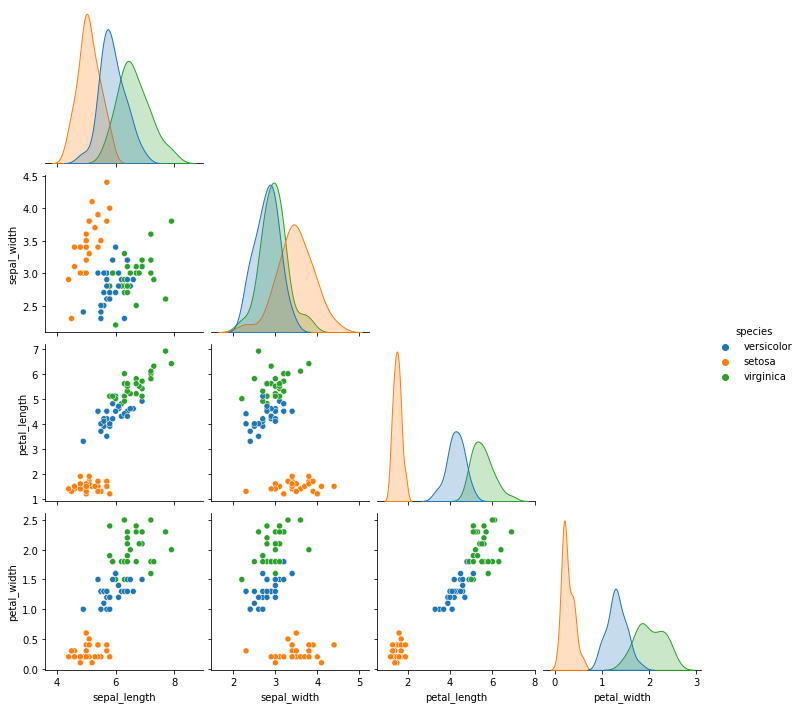

In [18]:
sns.pairplot(train, hue='species', corner=True)

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [19]:
train_melt = pd.melt(train, 
                  id_vars='species', 
                  value_vars=train[quant_vars],
                  var_name='measure', 
                  value_name='measurement')
train_melt

,species,measure,measurement
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


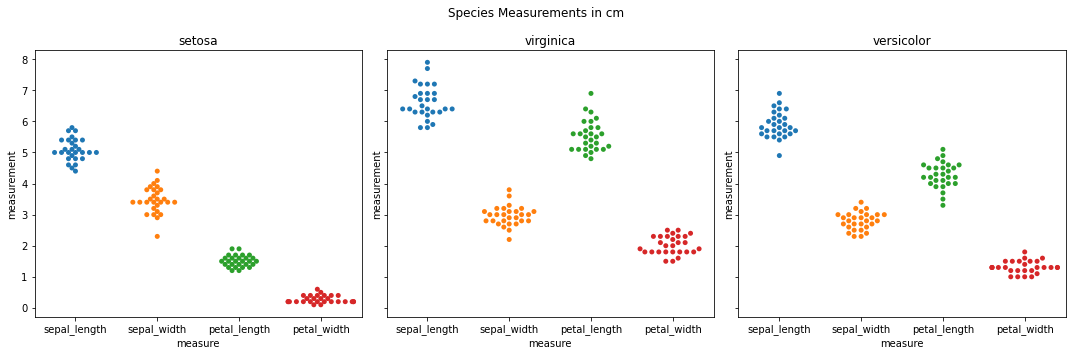

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.color_palette("tab10")
fig.suptitle("Species Measurements in cm")

sns.swarmplot(ax=axes[0], data=train_melt[train_melt.species=='setosa'], x='measure', y='measurement').set(title='setosa')

sns.swarmplot(ax=axes[1], data=train_melt[train_melt.species=='virginica'], x='measure', y='measurement').set(title='virginica')

sns.swarmplot(ax=axes[2], data=train_melt[train_melt.species=='versicolor'], x='measure', y='measurement').set(title='versicolor')

plt.tight_layout()

**Takeaways**

>Setosa's will typically be the smallest of all plant
>
>Virginica and versicolor's have similar patterns in terms of measures
>
>Differentiating between species using only speal width would be dificult to accomplish

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

**Estalblish the Hypothesis**

$H_{0}$:The mean petal lengths of the setosa and versicolor have no significant difference.

$H_{a}$: The mean petal length of the setosa is significantly different from the mean petal versicolor.

**Significance Level**

In [21]:
alpha = 0.5

**Verify Assumptions**

In [22]:
setosa_iris = train_melt[(train_melt.species=='setosa') & (train_melt.measure=='petal_length')].measurement
versicolor_iris = train_melt[(train_melt.species=='versicolor') & (train_melt.measure=='petal_length')].measurement

In [23]:
setosa_iris.mean()

1.5071428571428573

In [24]:
setosa_mean = setosa_iris.mean()
set_std = stdev(setosa_iris)
print(set_std)

0.18444826922788954


In [25]:
versicolor_mean = versicolor_iris.mean()
ver_std = stdev(versicolor_iris)
print(ver_std)

0.4099296623108994


In [26]:
set_var = setosa_iris.var()
print(set_var)
ver_var = versicolor_iris.var()
print(ver_var)

0.03402116402116402
0.16804232804232802


- Since the measurements are from different species, they are independent of the other.

- Each species has more than 30 observations

- The variances of the species' petal lengths are not even

**Compute the Statistic**

In [27]:
statistic, p = stats.mannwhitneyu(x, y)
statistic, p

(17.0, 3.235595834904965e-10)

**Decide**

In [28]:
print(f"Is p < alpha? \n{p < alpha}")
if p > alpha:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

Is p < alpha? 
True
We reject $H_{0}$


From the Mann-Whitney test, we see that the mean petal length for the setosa is significantly different from the mean petal length of the versicolor.